In [1]:
default_parameters = {
    "width": 1000,
    "height": 1000,
    "initial_mosquitos":10000, 
    "initial_humans": 10000,
    "houses": 1000,
    "ponds": 10,
    "percentage_of_infected_humans": 0.4,
    "percentage_of_infected_mosquitos": 0.2,
    
    "human_incubation_period_range": [7, 30],
    "human_recovery_probability_multiplier": 0.037,
    "human_susceptible_probability_multiplier": 0.01,

    "mosquito_larvae_period_range": [9, 14],
    "mosquito_adult_life_range": [7, 30],
    "mosquito_daily_min_eggs_laid": 50,
    "mosquito_daily_max_eggs_laid": 200,
    "mosquito_lifetime_max_eggs": 500,
    "mosquito_incubation_period_range": [10, 21],
    "mosquito_probability_of_exposition": 0.02,
    "mosquito_probability_of_infecting_human": 0.5,
    "mosquito_daily_steps": 10,
}

In [5]:
from model import MalariaInfectionModel

parameters = {
    "width": 100,
    "height": 100,
    "initial_mosquitos":600, 
    "initial_humans": 120,
    "houses": 60,
    "ponds": 10,
    "percentage_of_infected_humans": 0.4,
    "percentage_of_infected_mosquitos": 0.2,
    
    "human_incubation_period_range": [7, 30],
    "human_recovery_probability_multiplier": 0.037,
    "human_susceptible_probability_multiplier": 0.01,

    "mosquito_larvae_period_range": [9, 14],
    "mosquito_adult_life_range": [7, 30],
    "mosquito_daily_min_eggs_laid": 50,
    "mosquito_daily_max_eggs_laid": 200,
    "mosquito_lifetime_max_eggs": 500,
    "mosquito_incubation_period_range": [10, 21],
    "mosquito_probability_of_exposition": 0.02,
    "mosquito_probability_of_infecting_human": 0.5,
    "mosquito_daily_steps": 10,
}


starter_model = MalariaInfectionModel(**parameters)

initial_infected_count = starter_model.count_infected_humans()
print("Initial Number of Infected Humans:", initial_infected_count)
initial_susceptible_count = starter_model.count_susceptible_humans()
print("Initial Number of Susceptible Humans:", initial_susceptible_count)

# Symulacja przez 60 dni
day = -1
for i in range(720):
    if day != starter_model.day_count:
        day = starter_model.day_count
        print(f"day {day}")
        print(f"total mosquitos: {starter_model.count_infected_mosquitos()+starter_model.count_exposed_mosquitos()+starter_model.count_susceptible_mosquitos()}")
        print(f"infected mosquitos: {starter_model.count_infected_mosquitos()}")
        print(f"exposed mosquitos: {starter_model.count_exposed_mosquitos()}")
        print(f"adul mosquitos: {starter_model.count_adult_mosquitos()}")
        print(f"infected humans: {starter_model.count_infected_humans()}")
        print(f"exposed humans: {starter_model.count_exposed_humans()}")
        print("\n")
    starter_model.step()

final_infected_count = starter_model.count_infected_humans()
print("Final Number of Infected Humans:", final_infected_count)
final_susceptible_count = starter_model.count_susceptible_humans()
print("Final Number of Susceptible Humans:", final_susceptible_count)
final_exposed_count = starter_model.count_exposed_humans()
print("Final Number of Exposed Humans:", final_exposed_count)
final_recovered_count = starter_model.count_infected_humans()
print("Final Number of Recovered Humans:", final_recovered_count)
final_deaths_count = starter_model.count_deaths()
print("Deaths: ", final_deaths_count)

Initial Number of Infected Humans: 48
Initial Number of Susceptible Humans: 72
day 0
total mosquitos: 600
infected mosquitos: 120
exposed mosquitos: 0
adul mosquitos: 282
infected humans: 48
exposed humans: 0


day 1
total mosquitos: 594
infected mosquitos: 119
exposed mosquitos: 0
adul mosquitos: 276
infected humans: 48
exposed humans: 2


day 2
total mosquitos: 694
infected mosquitos: 118
exposed mosquitos: 0
adul mosquitos: 271
infected humans: 46
exposed humans: 5


day 3
total mosquitos: 872
infected mosquitos: 118
exposed mosquitos: 1
adul mosquitos: 267
infected humans: 46
exposed humans: 7


day 4
total mosquitos: 872
infected mosquitos: 118
exposed mosquitos: 2
adul mosquitos: 267
infected humans: 42
exposed humans: 11


day 5
total mosquitos: 1021
infected mosquitos: 269
exposed mosquitos: 2
adul mosquitos: 265
infected humans: 38
exposed humans: 15


day 6
total mosquitos: 1152
infected mosquitos: 266
exposed mosquitos: 2
adul mosquitos: 261
infected humans: 32
exposed human

In [6]:
starter_model = MalariaInfectionModel(**parameters)

infected_counts_over_time = []

initial_infected_count = starter_model.count_infected_humans()
print("Initial Number of Infected Humans:", initial_infected_count)
initial_susceptible_count = starter_model.count_susceptible_humans()
print("Initial Number of Susceptible Humans:", initial_susceptible_count)

for _ in range(30):  
    for _ in range(24): 
        starter_model.step()

    infected_count = starter_model.count_infected_humans()
    infected_counts_over_time.append(infected_count)

final_infected_count = starter_model.count_infected_humans()
print("Final Number of Infected Humans:", final_infected_count)
final_susceptible_count = starter_model.count_susceptible_humans()
print("Final Number of Susceptible Humans:", final_susceptible_count)
final_exposed_count = starter_model.count_exposed_humans()
print("Final Number of Exposed Humans:", final_exposed_count)
final_recovered_count = starter_model.count_infected_humans()
print("Final Number of Recovered Humans:", final_recovered_count)
final_deaths_count = starter_model.count_deaths()
print("Deaths: ", final_deaths_count)

Initial Number of Infected Humans: 48
Initial Number of Susceptible Humans: 72
Final Number of Infected Humans: 11
Final Number of Susceptible Humans: 68
Final Number of Exposed Humans: 38
Final Number of Recovered Humans: 11
Deaths:  0


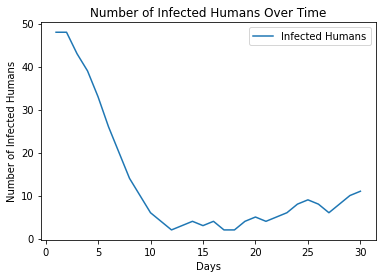

In [7]:
import matplotlib.pyplot as plt

days = range(1, len(infected_counts_over_time) + 1)
plt.plot(days, infected_counts_over_time, label="Infected Humans")
plt.xlabel("Days")
plt.ylabel("Number of Infected Humans")
plt.legend()
plt.title("Number of Infected Humans Over Time")
plt.show()